### Prepare data

In [7]:
from datetime import datetime
print('Hello World')

Hello World


In [58]:
# Convert timestring returned by time utility to a float of seconds
def tstr_to_sec(time_string):
    nofrag, frag = time_string.split('.')
    pt = datetime.strptime(nofrag,'%Mm%S')   
    total_seconds = pt.second + pt.minute*60 + float('.' + frag[:-1])
    return total_seconds

In [85]:
labels = [1, 3, 6, 12]

# Experiment data
blackscholes = ['4m4.687s', '1m36.965s', '1m9.475s', '1m2.367s']
canneal = ['5m14.839s', '2m32.797s', '2m7.859s', '2m1.257s']
dedup = ['0m50.997s', '0m21.670s', '0m23.503s', '0m37.358s']
ferret = ['12m28.561s', '4m23.300s', '3m13.883s','3m8.452s']
fft = ['2m36.123s']
freqmine = ['8m8.598s', '2m44.157s', '1m51.777s', '1m43.407s']

#Dont round yet
rounding = 4

blackscholes = [round(tstr_to_sec(a), rounding) for a in blackscholes]
canneal = [round(tstr_to_sec(a), rounding) for a in canneal]
dedup = [round(tstr_to_sec(a), rounding) for a in dedup]
ferret = [round(tstr_to_sec(a), rounding) for a in ferret]
fft = [round(tstr_to_sec(a), rounding) for a in fft]
freqmine = [round(tstr_to_sec(a), rounding) for a in freqmine]

In [86]:
# Compute speedup and normalize to single thread configuration
def normalized_speedup(values):
    return [ values[0] / a for a in values]

In [87]:
blackscholes_n = normalized_speedup(blackscholes)
canneal_n = normalized_speedup(canneal)
dedup_n = normalized_speedup(dedup)
ferret_n = normalized_speedup(ferret)
fft_n = normalized_speedup(fft)
freqmine_n = normalized_speedup(freqmine)

### Plot

In [88]:
import matplotlib as mpl
from matplotlib import pyplot as plt

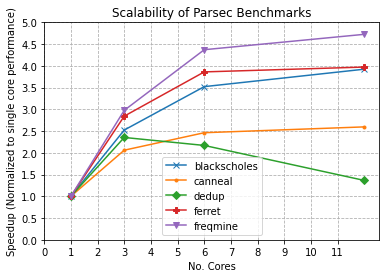

In [108]:
# plot lines

plt.plot(labels, blackscholes_n, label = "blackscholes", marker='x')
plt.plot(labels, canneal_n, label = "canneal", marker='.')
plt.plot(labels, dedup_n, label = "dedup", marker='D')
plt.plot(labels, ferret_n, label = "ferret", marker='P')
plt.plot(labels, freqmine_n, label = "freqmine", marker='v')
plt.legend()
plt.xlabel("No. Cores")
plt.ylabel("Speedup (Normalized to single core performance)")
plt.xticks(range(12))
plt.yticks([0, 0.5 ,1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title('Scalability of Parsec Benchmarks')
plt.grid(ls='--')
# TODO: FFT
#plt.plot(labels, blackscholes_n, label = "blackscholes")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


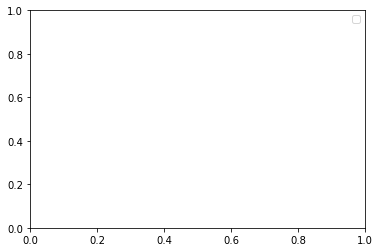

In [96]:
# display plot

plt.show()